<a href="https://colab.research.google.com/github/euglpz/Udemy_Courses_Analyze/blob/main/An%C3%A1lisis_evoluci%C3%B3n_cursos_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset: Udemy Courses
######https://www.kaggle.com/datasets/hossaingh/udemy-courses?select=Course_info.csv


¿Cuáles son las tematicas más populares?

¿Cómo fue evolucionando producto de la pandemia?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
!pip install odfpy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 717 kB 14.2 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=114763a9c6cb0916ca77c6623fb55d5fba4fd1c41c434548581b1c94f5d35bf9
  Stored in directory: /root/.cache/pip/wheels/ea/af/da/2bdd7308f7b334429a558df1e36d31864cd19c07ede92ddf0e
Successfully built odfpy


Realizamos una verificación de series para detectar cuales se veían afectadas por elementos nulos.

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Course_info.csv')
data

data.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

En principio, el análisis se realiza sobre la fecha de publicación que no contiene nulos en su serie.

In [ ]:
# Buscamos el rango de fechas de publicación de los cursos

print(data['published_time'].min(), data['published_time'].max())

2010-01-12T18:09:46Z 2022-10-05T17:04:08Z


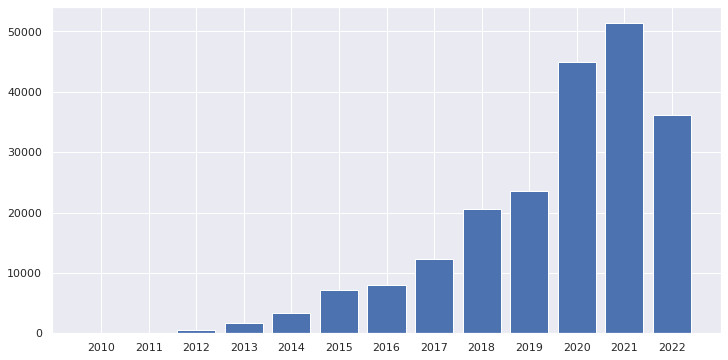

count    209734.000000
mean       2019.606888
std           2.105228
min        2010.000000
25%        2018.000000
50%        2020.000000
75%        2021.000000
max        2022.000000
Name: published_year, dtype: float64

In [ ]:
# Creamos una nueva serie con el año de publicacion de los cursos
data['published_year'] = data['published_time'].apply(lambda s: int(s.split('-')[0]))
data['published_year']

# Gráfica de cantidad de cursos por año
x_values = data['published_year'].unique()
y_values = data['published_year'].value_counts(sort=False).tolist()
plt.figure(figsize=(12,6))
plt.xticks(range(2010,2023,1))
plt.bar(x_values, y_values)
plt.show()
plt.close('all')

# Datos sobre los años de los cursos
data['published_year'].describe()

En el comienzo de la pandemia podemos ver que se duplica la cantidad de cursos. 
Nos enfocaremos principalmente en el análisis de las categorías más populares.

In [ ]:
# Buscamos las categorias de los cursos (se consideran todos los años)
data['category'].unique()

array(['Lifestyle', 'Business', 'Design', 'Health & Fitness',
       'Finance & Accounting', 'Development', 'Marketing',
       'Teaching & Academics', 'IT & Software', 'Office Productivity',
       'Music', 'Personal Development', 'Photography & Video'],
      dtype=object)

In [ ]:
#Obtenemos la cantidad de cursos publicados en cada categoría en el periodo analizado
data['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

Tomaremos la categoría que tiene la mayor cantidad de cursos publicados, con el objetivo de estudiar su evolución.

In [ ]:
#Creamos un filtro con los cursos de Development
filtro = data['category'] == 'Development'
#Visualizamos lo obtenido
filtro.head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14     True
15    False
16    False
17     True
18    False
19    False
Name: category, dtype: bool

In [ ]:
#Generamos un nuevo dataframe llamado "data_development" a partir del dataframe principal "data" aplicándole el filtro:
data_development = data[filtro]
#Visualizamos lo obtenido
data_development

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,published_year
7,8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824.0,4.000000,741.0,189.0,56.0,...,2011-07-08T21:32:55Z,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/,2011
12,8416.0,Beginners - How To Create iPhone And iPad Apps...,True,49.99,Learn How To Create IOS Apps And Never Do A Ha...,2058.0,3.650000,25.0,8.0,81.0,...,2011-07-06T23:45:18Z,2017-01-09,Development,Mobile Development,iOS Development,English,/course/beginners-guide-to-iphone-ipad-app-cre...,Infinite Skills,/user/infiniteskills/,2011
14,8324.0,Javascript for Beginners,True,19.99,Learn javascript online and supercharge your w...,9714.0,4.408389,1081.0,194.0,48.0,...,2011-07-09T05:43:31Z,2020-10-03,Development,Web Development,JavaScript,English,/course/beginning-javascript/,Dollar Design School,/user/marklassoff/,2011
17,8319.0,Git Basics: In Theory and Practice,True,19.99,Learn Effective Source Control Management with...,296.0,3.750000,13.0,8.0,31.0,...,2011-07-29T20:24:56Z,NaN,Development,Software Development Tools,Git,English,/course/git-in-theory-and-in-practice/,Tony Hillerson,/user/tonyhillerson/,2011
37,9463.0,Programming Java for Beginners - The Ultimate ...,True,49.99,Learn Java Programming at your own Pace. Comes...,54983.0,4.500000,1374.0,347.0,114.0,...,2011-09-15T15:19:57Z,2017-01-09,Development,Programming Languages,Java,English,/course/learn-to-program-with-java/,Infinite Skills,/user/infiniteskills/,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209670,4910434.0,Python Crash Course For Absolute Beginners in ...,False,0.00,Learn Python like a Professional Start from th...,595.0,4.384615,13.0,7.0,26.0,...,2022-10-04T07:41:15Z,2022-10-06,Development,Programming Languages,Python,Hindi,/course/python-crash-course-for-beginners-zero...,Vijay Patel,/user/vijay-251/,2022
209689,4910498.0,How to Download and Restore Databases in SQL ...,False,0.00,Restore databases into SQL Server using SQL Se...,1545.0,5.000000,1.0,0.0,14.0,...,2022-10-04T01:36:46Z,2022-10-03,Development,Database Design & Development,Database Management,English,/course/how-to-download-and-restore-databases-...,Bluelime Learning Solutions,/user/javascript-academy/,2022
209696,4911382.0,"Create a register, login and forgot password a...",True,19.99,Learn how to build database driven Web applica...,0.0,0.000000,0.0,0.0,29.0,...,2022-10-05T06:13:52Z,2022-10-04,Development,Web Development,PHP,English,/course/create-a-secure-register-login-and-for...,Filipe Santos,/user/filipesantos4/,2022
209712,4912524.0,Build Complete Website Using Django 3,True,199.99,Build Complete Website Using Django 3 From Scr...,0.0,0.000000,0.0,0.0,24.0,...,2022-10-04T15:45:28Z,2022-10-04,Development,Web Development,Django,English,/course/build-complete-website-using-django-3/,Mustafa Alawi,/user/moastalwee/,2022


In [ ]:
#Seteamos el ID como índice:
data_development.set_index('id', inplace = True)
data_development

,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,published_year
id,,,,,,,,,,,,,,,,,,,,
8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824.0,4.000000,741.0,189.0,56.0,363.0,2011-07-08T21:32:55Z,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/,2011
8416.0,Beginners - How To Create iPhone And iPad Apps...,True,49.99,Learn How To Create IOS Apps And Never Do A Ha...,2058.0,3.650000,25.0,8.0,81.0,459.0,2011-07-06T23:45:18Z,2017-01-09,Development,Mobile Development,iOS Development,English,/course/beginners-guide-to-iphone-ipad-app-cre...,Infinite Skills,/user/infiniteskills/,2011
8324.0,Javascript for Beginners,True,19.99,Learn javascript online and supercharge your w...,9714.0,4.408389,1081.0,194.0,48.0,183.0,2011-07-09T05:43:31Z,2020-10-03,Development,Web Development,JavaScript,English,/course/beginning-javascript/,Dollar Design School,/user/marklassoff/,2011
8319.0,Git Basics: In Theory and Practice,True,19.99,Learn Effective Source Control Management with...,296.0,3.750000,13.0,8.0,31.0,454.0,2011-07-29T20:24:56Z,NaN,Development,Software Development Tools,Git,English,/course/git-in-theory-and-in-practice/,Tony Hillerson,/user/tonyhillerson/,2011
9463.0,Programming Java for Beginners - The Ultimate ...,True,49.99,Learn Java Programming at your own Pace. Comes...,54983.0,4.500000,1374.0,347.0,114.0,585.0,2011-09-15T15:19:57Z,2017-01-09,Development,Programming Languages,Java,English,/course/learn-to-program-with-java/,Infinite Skills,/user/infiniteskills/,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910434.0,Python Crash Course For Absolute Beginners in ...,False,0.00,Learn Python like a Professional Start from th...,595.0,4.384615,13.0,7.0,26.0,105.0,2022-10-04T07:41:15Z,2022-10-06,Development,Programming Languages,Python,Hindi,/course/python-crash-course-for-beginners-zero...,Vijay Patel,/user/vijay-251/,2022
4910498.0,How to Download and Restore Databases in SQL ...,False,0.00,Restore databases into SQL Server using SQL Se...,1545.0,5.000000,1.0,0.0,14.0,70.0,2022-10-04T01:36:46Z,2022-10-03,Development,Database Design & Development,Database Management,English,/course/how-to-download-and-restore-databases-...,Bluelime Learning Solutions,/user/javascript-academy/,2022
4911382.0,"Create a register, login and forgot password a...",True,19.99,Learn how to build database driven Web applica...,0.0,0.000000,0.0,0.0,29.0,430.0,2022-10-05T06:13:52Z,2022-10-04,Development,Web Development,PHP,English,/course/create-a-secure-register-login-and-for...,Filipe Santos,/user/filipesantos4/,2022


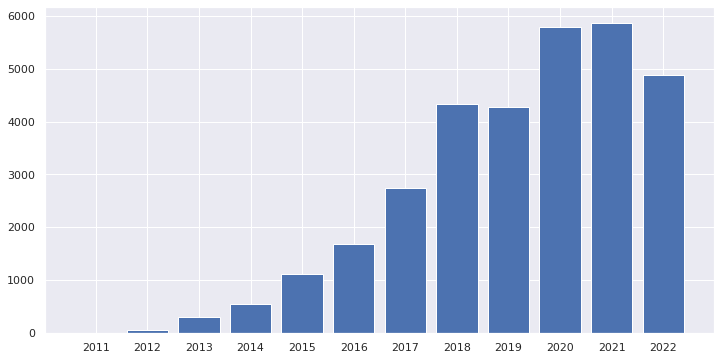

In [ ]:
# Gráfica cantidad de cursos de la categoría Development por año
x_values = data_development['published_year'].unique()
y_values = data_development['published_year'].value_counts(sort=False).tolist()
plt.figure(figsize=(12,6))
plt.xticks(range(2010,2023,1))
plt.bar(x_values, y_values)
plt.show()
plt.close('all')

In [ ]:
#Verificamos si todos los cursos tienen Topic
data_development['topic'].isnull().sum()

0

In [ ]:
#Encontramos algunos valores nulos que rellenaremos para continuar el análisis
data_development['topic'].fillna('No esp.', inplace = True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Verficamos que no haya nulos y que las filas se hayan rellenado correctamente
data_development[data_development['topic'].str.contains('No esp.')].head()

,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,published_year
id,,,,,,,,,,,,,,,,,,,,
229364.0,Introductory Game Development Course with Cons...,True,29.99,Learn what is required to make a game by break...,59.0,3.375000,4.0,1.0,20.0,154.0,2014-07-10T19:35:25Z,2014-07-17,Development,Game Development,No esp.,English,/course/introductory-game-development-course-w...,Jay Li,/user/jayli6/,2014
246844.0,ビッグデータ時代のクラウド活用とは？ (Adtech Tokyo 2013 Track B-4),False,0.00,ビッグデータ時代のクラウド活用とは？,654.0,3.400000,17.0,2.0,8.0,51.0,2014-08-21T11:13:12Z,2014-06-19,Development,Database Design & Development,No esp.,Japanese,/course/elearners-adtechtokyo2013trackb4/,映像学習サービス elearners,/user/elearners/,2014
247096.0,クラウドコンピューティング：クラウドサービスをどのようにビジネスに生かせるのか？,False,0.00,Adtech Tokyo 2012 Track B-4,734.0,2.750000,18.0,2.0,8.0,51.0,2014-08-21T11:58:25Z,2014-06-20,Development,Database Design & Development,No esp.,Japanese,/course/elearners-adtechtokyo2012trackb4/,映像学習サービス elearners,/user/elearners/,2014
422012.0,Querying Microsoft SQL Server 2012 - (Exam No....,True,84.99,Master in SQL Server 2012 in a step-by-step ma...,3374.0,4.440299,960.0,113.0,115.0,385.0,2015-03-12T21:20:41Z,2015-03-11,Development,Web Development,No esp.,English,/course/querying-sql-server-2012-70-461/,Compaq learning,/user/techteach/,2015
434152.0,Filemaker Beginner Tutorial - contacts database,False,0.00,Get to know Filemaker by designing a simple co...,17207.0,4.700000,1167.0,336.0,9.0,107.0,2015-03-03T00:05:06Z,2022-08-05,Development,Database Design & Development,No esp.,English,/course/filemaker-beginner-tutorial-contacts-d...,Guy Stevens,/user/guystevens4/,2015


In [ ]:
#Seleccionamos los topicos mas populares en general
data_development['topic'].value_counts().head(10)

Python                 1913
JavaScript              947
Java                    910
WordPress               783
Web Development         715
Unity                   661
PHP                     626
C#                      618
React JS                526
Android Development     519
Name: topic, dtype: int64

Utilizando groupby generamos dos series con los 10 tópicos más populares en los años de mayor cantidad de cursos (2020-2021)

Año 2020

In [ ]:
# Seleccionamos los 20 topicos mas populares de la categoría Development en el año 2020
data.groupby(['published_year','category','topic'])
filtro1 = data['published_year'] == 2020
filtro2 = data['category'] == 'Development'

#Creamos un diccionario para la nube de palabras porque no funciona con un dataframe
wordcloud2020 = data[filtro1][filtro2]['topic'].value_counts().head(20).to_dict()

top20_2020 = data[filtro1][filtro2].groupby(['published_year','category','topic'])['topic'].count().sort_values(ascending=False).head(20)
top20_2020


<ipython-input-24-a643a7cdb4de>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wordcloud2020 = data[filtro1][filtro2]['topic'].value_counts().head(20).to_dict()
<ipython-input-24-a643a7cdb4de>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top20_2020 = data[filtro1][filtro2].groupby(['published_year','category','topic'])['topic'].count().sort_values(ascending=False).head(20)


published_year  category     topic                   
2020            Development  Python                      413
                             Java                        164
                             JavaScript                  161
                             Web Development             158
                             WordPress                   137
                             React JS                    135
                             C#                          109
                             Machine Learning            108
                             Android Development         102
                             Unity                       101
                             Google Flutter               89
                             Laravel                      87
                             Data Science                 81
                             Node.Js                      67
                             C++                          66
                             CS

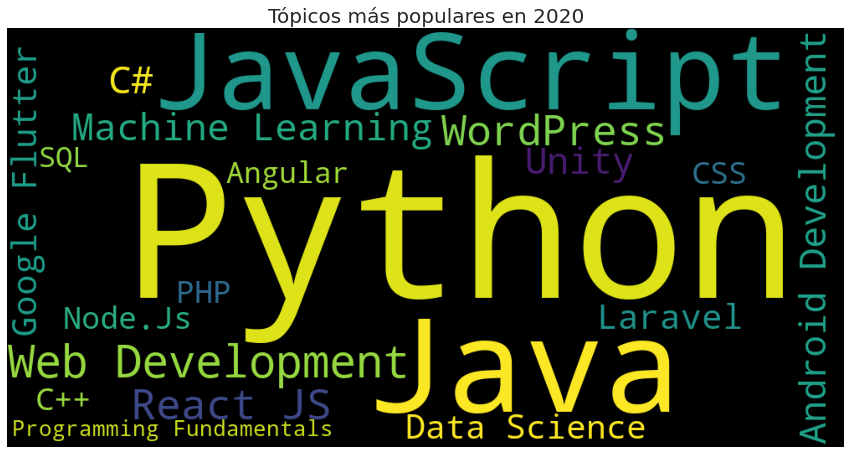

In [ ]:
#Realizamos el gráfico nube de palabras:

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(wordcloud2020)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Tópicos más populares en 2020',fontsize=20);
plt.axis("off");
plt.show();

Año 2021

In [ ]:
# Seleccionamos los 20 topicos mas populares de la categoría Development en el año 2021
data.groupby(['published_year','category','topic'])
filtro1 = data['published_year'] == 2021
filtro2 = data['category'] == 'Development'

#Creamos un diccionario para la nube de palabras porque no funciona con un dataframe
wordcloud2021 = data[filtro1][filtro2]['topic'].value_counts().head(20).to_dict()

top20_2021 = data[filtro1][filtro2].groupby(['published_year','category','topic'])['topic'].count().sort_values(ascending=False).head(20)
top20_2021

<ipython-input-26-31d6cc6fabb5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wordcloud2021 = data[filtro1][filtro2]['topic'].value_counts().head(20).to_dict()
<ipython-input-26-31d6cc6fabb5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top20_2021 = data[filtro1][filtro2].groupby(['published_year','category','topic'])['topic'].count().sort_values(ascending=False).head(20)


published_year  category     topic                   
2021            Development  Python                      423
                             WordPress                   163
                             Web Development             155
                             Java                        150
                             JavaScript                  135
                             Google Flutter              116
                             React JS                    114
                             Unity                       100
                             PHP                          95
                             Machine Learning             92
                             Data Science                 89
                             Laravel                      85
                             C#                           78
                             SQL                          72
                             Programming Fundamentals     66
                             C+

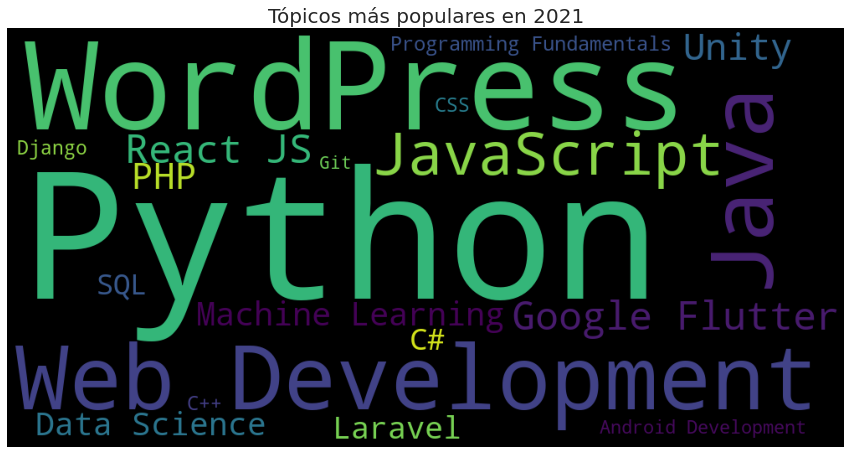

In [ ]:
#Realizamos el gráfico nube de palabras:

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(wordcloud2021)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Tópicos más populares en 2021',fontsize=20);
plt.axis("off");
plt.show();

Conclusión:

En ambos años el tópico con más cursos fue Python

En el 2020: El segundo y tercer lugar: Java y JavaScript 

En el 2021: El segundo y tercer lugar: WordPress y Web Development


Todos estuvieron en las 5 primeras posiciones en los años analizados. Podemos afirmar que son los cursos más solicitados.

Luego, nos propusimos realizar una grafica para plasmar la evolucion de los cursos de programacion en funcion del año.

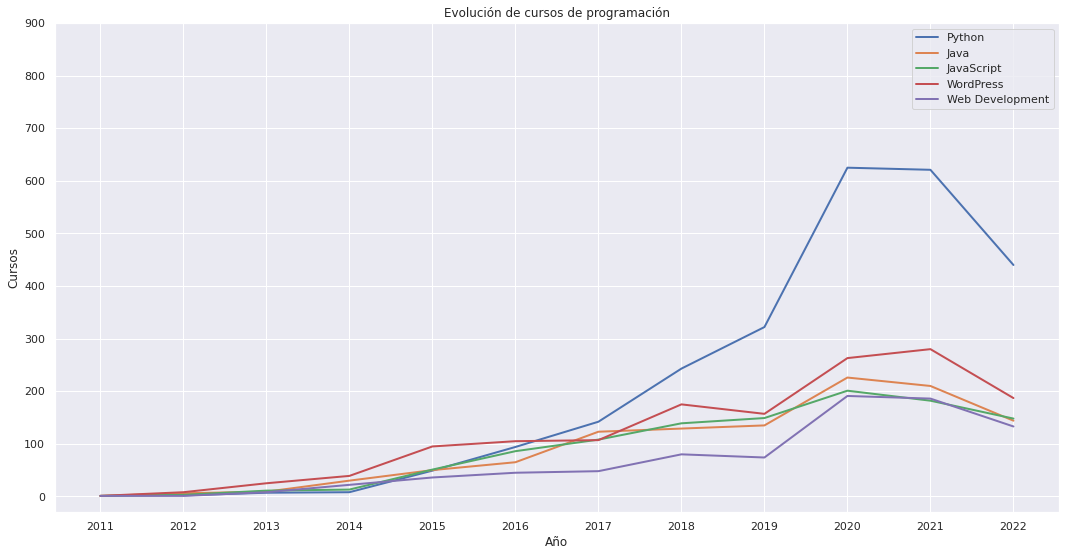

In [ ]:
# Seleccionamos los 20 topicos mas populares de Python
data.groupby(['published_year','topic'])
filtro1 = data['topic'] == 'Python'

#Creamos un diccionario para la grafica porque no funciona con un dataframe
trend_python = data[filtro1].groupby(['published_year'])['topic'].count().to_dict()
trend_python

x = list(trend_python.keys())
y = list(trend_python.values())

fig, ax = plt.subplots(figsize=(18, 9))

ax.plot(x, y, linewidth=2.0, label='Python')

#-----------------------------------------------------------------------------------

# Seleccionamos los 20 topicos mas populares de Java
data.groupby(['published_year','topic'])
filtro1 = data['topic'] == 'Java'

#Creamos un diccionario para la grafica porque no funciona con un dataframe
trend_java = data[filtro1].groupby(['published_year'])['topic'].count().to_dict()
trend_java

x = list(trend_java.keys())
y = list(trend_java.values())

ax.plot(x, y, linewidth=2.0, label='Java')

#-----------------------------------------------------------------------------------

# Seleccionamos los 20 topicos mas populares de JavaScript
data.groupby(['published_year','topic'])
filtro1 = data['topic'] == 'JavaScript'

#Creamos un diccionario para la grafica porque no funciona con un dataframe
trend_javascr = data[filtro1].groupby(['published_year'])['topic'].count().to_dict()
trend_javascr

x = list(trend_javascr.keys())
y = list(trend_javascr.values())

ax.plot(x, y, linewidth=2.0, label='JavaScript')

#-----------------------------------------------------------------------------------

# Seleccionamos los 20 topicos mas populares de WordPress
data.groupby(['published_year','topic'])
filtro1 = data['topic'] == 'WordPress'

#Creamos un diccionario para la grafica porque no funciona con un dataframe
trend_wordpress = data[filtro1].groupby(['published_year'])['topic'].count().to_dict()
trend_wordpress

x = list(trend_wordpress.keys())
y = list(trend_wordpress.values())

ax.plot(x, y, linewidth=2.0, label='WordPress')

#-----------------------------------------------------------------------------------

# Seleccionamos los 20 topicos mas populares de Web Development
data.groupby(['published_year','topic'])
filtro1 = data['topic'] == 'Web Development'

#Creamos un diccionario para la grafica porque no funciona con un dataframe
trend_web = data[filtro1].groupby(['published_year'])['topic'].count().to_dict()
trend_web

x = list(trend_web.keys())
y = list(trend_web.values())

ax.plot(x, y, linewidth=2.0, label='Web Development')


plt.legend();
plt.xlabel('Año')
plt.xticks(range(2011,2023,1))
plt.ylabel('Cursos')
plt.yticks(range(0,1000,100))
plt.title("Evolución de cursos de programación")
plt.show()


Analizamos la tendencia de estos cinco tópicos a lo largo de todos los años registrados y observamos que a partir del año 2017 comenzó un pronunciado crecimiento de los cursos relacionados con Python.